In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np


In [222]:
import matplotlib.pyplot as plt

In [43]:
import pandas as pd

In [4]:
import seaborn as sns

## Задание 3

In [276]:
data, target = load_diabetes(as_frame=True, return_X_y=True)

In [283]:
alphas = np.linspace(1e-6, 1, 200) # сетка параметров   
coefs = [] # коэффициенты модели
for a in alphas:
    model = Lasso()
    model.set_params(alpha = a)
    model.fit(data, target)
    coefs.append(model.coef_) 
#coefs

In [279]:
category = data.columns.to_list()
category

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [282]:
np.array(coefs).T

array([[ -10.00885256,   -5.63286873,   -1.2601264 , ...,    0.        ,
           0.        ,    0.        ],
       [-239.81472427, -234.28600374, -228.76289573, ...,   -0.        ,
          -0.        ,   -0.        ],
       [ 519.84634171,  522.72620949,  525.59521534, ...,  370.06948063,
         368.88666335,  367.70385976],
       ...,
       [ 177.05062016,  148.10985123,  119.30618856, ...,    0.        ,
           0.        ,    0.        ],
       [ 751.24775484,  660.62981483,  570.41700625, ...,  309.98001038,
         308.79271718,  307.6054181 ],
       [  67.62654232,   66.31131765,   64.99493994, ...,    0.        ,
           0.        ,    0.        ]])

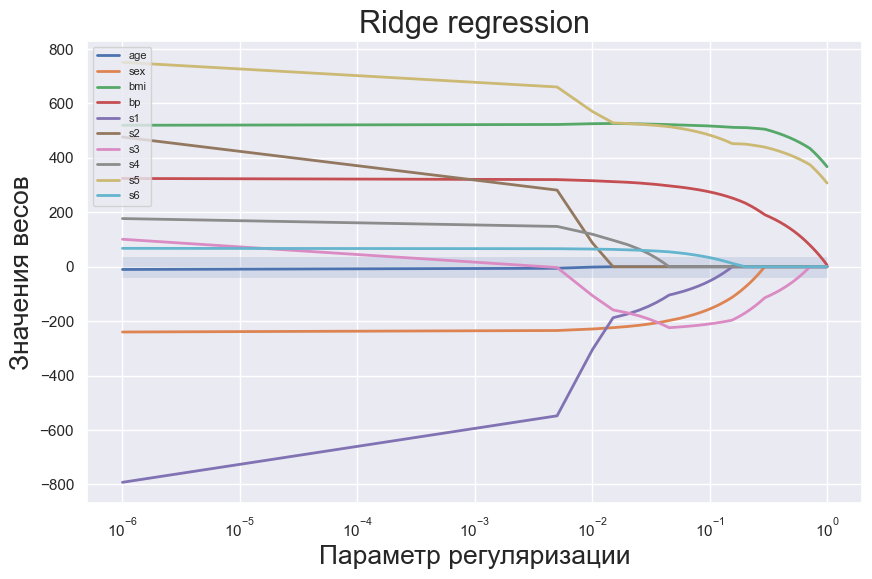

In [281]:
plt.figure(figsize=(10,6))
ax = plt.gca() # используется для получения текущего экземпляра axes
ax.hlines(0, 1e-6, 1, linewidth=15, alpha=0.15)
ind = 0
for coef in np.array(coefs).T:
    label = category[ind]
    ax.plot(alphas, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
    ind += 1
        
ax.set_xscale('log') # логарифмическая шкала
plt.xlabel('Параметр регуляризации', fontsize=19)
plt.ylabel('Значения весов', fontsize=19)
plt.title('Ridge regression', fontsize=22)
plt.legend(loc='upper left', fontsize=8)
plt.axis('tight')
plt.show()

Можем пронаблюдать, как с увеличением параметра регуляризации веса признаков зануляются, и остаются только самые "сильные"